In [1]:
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
data = pd.read_csv('resources/data.csv')
data.head(5)

,Cases,Deaths,Vaccination Rate,Population,Median Age,Household Income,Heart Disease,Stroke,Party,County,State,Cases per Capita,Deaths per Capita
0,6104,57.0,39.2,24657.0,43.8,36685.0,321.0,78.6,REPUBLICAN,Abbeville,South Carolina,0.247556,0.002312
1,14951,269.0,51.8,62568.0,36.2,41177.0,476.2,93.6,REPUBLICAN,Acadia,Louisiana,0.238956,0.004299
2,6569,90.0,70.7,32742.0,45.9,43210.0,411.2,92.1,REPUBLICAN,Accomack,Virginia,0.200629,0.002749
3,5535,56.0,44.0,25325.0,27.7,40046.0,335.1,80.7,REPUBLICAN,Adair,Missouri,0.218559,0.002211
4,6678,65.0,34.8,22113.0,37.6,32986.0,575.0,62.7,REPUBLICAN,Adair,Oklahoma,0.301994,0.002939


In [13]:
#function to break data up into any number of income groups before plotting
def bindata(numgroups):
    max_income = math.ceil(data['Household Income'].max()/1000) * 1000
    min_income = math.floor(data['Household Income'].min()/1000) * 1000
    income_steps = (max_income - min_income)/numgroups
    bins = [math.floor(income_steps*x + min_income) for x in range(numgroups + 1)]
    income_ranges = [f'\${bins[i-1]}-\${bins[i]}' for i in range(1, len(bins))]
    data["Median Income Range"] = pd.cut(data["Household Income"], bins, labels=income_ranges, include_lowest=True)
    return income_ranges

In [27]:
income_ranges = bindata(4)
data.head(5)

,Cases,Deaths,Vaccination Rate,Population,Median Age,Household Income,Heart Disease,Stroke,Party,County,State,Cases per Capita,Deaths per Capita,Median Income Range
0,6104,57.0,39.2,24657.0,43.8,36685.0,321.0,78.6,REPUBLICAN,Abbeville,South Carolina,0.247556,0.002312,\$24000-\$46250
1,14951,269.0,51.8,62568.0,36.2,41177.0,476.2,93.6,REPUBLICAN,Acadia,Louisiana,0.238956,0.004299,\$24000-\$46250
2,6569,90.0,70.7,32742.0,45.9,43210.0,411.2,92.1,REPUBLICAN,Accomack,Virginia,0.200629,0.002749,\$24000-\$46250
3,5535,56.0,44.0,25325.0,27.7,40046.0,335.1,80.7,REPUBLICAN,Adair,Missouri,0.218559,0.002211,\$24000-\$46250
4,6678,65.0,34.8,22113.0,37.6,32986.0,575.0,62.7,REPUBLICAN,Adair,Oklahoma,0.301994,0.002939,\$24000-\$46250


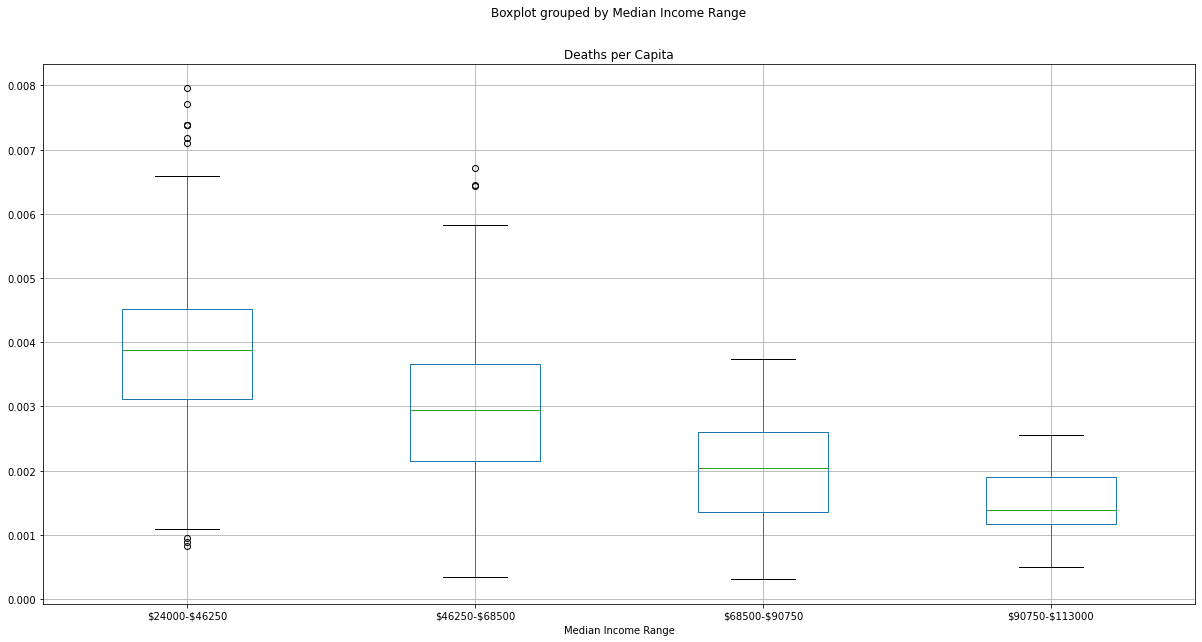

In [30]:
data.boxplot("Deaths per Capita", by="Median Income Range", figsize=(20, 10))
plt.show()

In [29]:
# Extract individual groups
income_groups = []
for i in income_ranges:   
    income_groups.append(data[data["Median Income Range"] == i]["Deaths per Capita"])
stats.f_oneway(*income_groups)

F_onewayResult(statistic=135.8418536093536, pvalue=1.6508411554290393e-77)